## Probabilistic Boosting 

For probabilistic boosting we use the ngboost package.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('default')

In [ ]:
#!pip install --upgrade ngboost

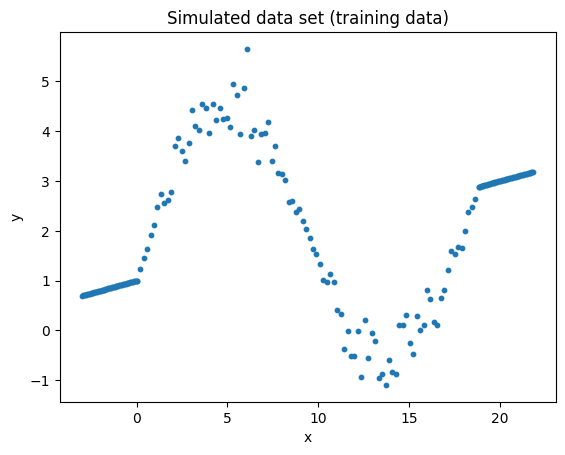

In [9]:
def dgp_2(n):
    np.random.seed(32)
    x = np.linspace(0,1*2*np.pi,n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x.reshape(-1,1),y.reshape(-1,1)

dgp = dgp_2

x_train, y_train = dgp(100)
plt.scatter(x_train, y_train, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated data set (training data)')
plt.show()

In [ ]:
# List all available distributions in ngboost
import inspect
from ngboost import distns

print("Available distributions in ngboost.distns:\n")
print("=" * 50)

# Get all distribution classes
dist_classes = []
for name in dir(distns):
    obj = getattr(distns, name)
    if inspect.isclass(obj) and hasattr(obj, 'params'):
        dist_classes.append(name)

# Sort and display
for dist_name in sorted(dist_classes):
    if not dist_name.startswith('_'):  # Skip private classes
        print(f"  - {dist_name}")

print("\n" + "=" * 50)
print("\nCommon distributions:")
print("  Regression:")
print("    - Normal: loc (mean) and scale (std)")
print("    - LogNormal: s (shape) and scale")
print("    - Exponential: scale")
print("    - StudentT: df (degrees of freedom), loc, scale")
print("    - Laplace: loc and scale")
print("    - Cauchy: loc and scale")
print("    - MultivariateNormal: mean vector and covariance matrix")
print("\n  Classification:")
print("    - Bernoulli: p (probability) for binary classification")
print("    - k_categorical(k): probabilities p0, p1, ..., p{k-1} for k classes")


In [39]:
from ngboost import NGBRegressor
from ngboost.distns import Normal, NormalFixedVar
ngb = NGBRegressor(Dist=NormalFixedVar).fit(x_train, y_train.flatten())

[iter 0] loss=1.9631 val_loss=0.0000 scale=2.0000 norm=2.5937
[iter 100] loss=0.9771 val_loss=0.0000 scale=2.0000 norm=0.4674
[iter 200] loss=0.9324 val_loss=0.0000 scale=2.0000 norm=0.1722
[iter 300] loss=0.9268 val_loss=0.0000 scale=2.0000 norm=0.1234
[iter 400] loss=0.9243 val_loss=0.0000 scale=2.0000 norm=0.1014


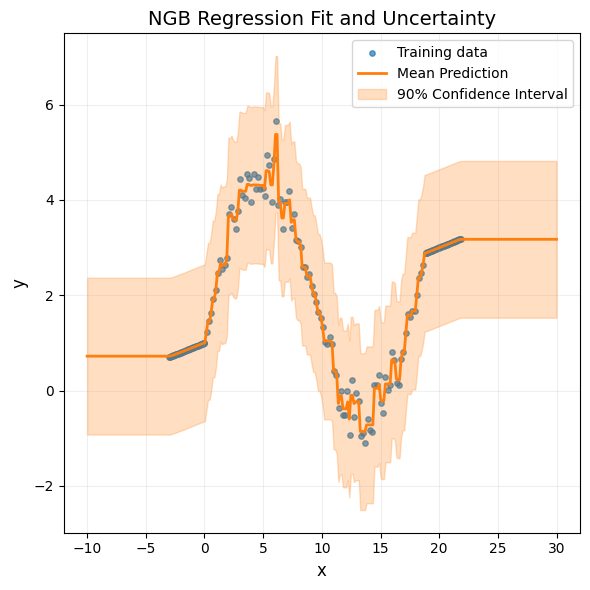

In [40]:
## Nicer plot with shaded confidence interval area between 5th and 95th percentiles
x_test = np.linspace(-10, 30, 300).reshape(-1, 1)
dist = ngb.pred_dist(x_test)

mus = dist.params['loc']
sigmas = dist.params['scale']

# Calculate percentiles for the confidence interval
lower = dist.dist.ppf(0.05)
upper = dist.dist.ppf(0.95)

plt.figure(figsize=(6,6))
plt.scatter(x_train, y_train, s=15, color='tab:blue', label='Training data', alpha=0.7)
plt.plot(x_test, mus, color='tab:orange', lw=2, label='Mean Prediction')
plt.fill_between(x_test.ravel(), lower, upper, color='tab:orange', alpha=0.25, label='90% Confidence Interval')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('NGB Regression Fit and Uncertainty', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [32]:
# List all available distributions in ngboost
import inspect
from ngboost import distns

print("Available distributions in ngboost.distns:\n")
print("=" * 50)

# Get all distribution classes
dist_classes = []
for name in dir(distns):
    obj = getattr(distns, name)
    if inspect.isclass(obj) and hasattr(obj, 'params'):
        dist_classes.append(name)

# Sort and display
for dist_name in sorted(dist_classes):
    if not dist_name.startswith('_'):  # Skip private classes
        print(f"  - {dist_name}")

print("\n" + "=" * 50)
print("\nCommon distributions:")
print("  Regression:")
print("    - Normal: loc (mean) and scale (std)")
print("    - LogNormal: s (shape) and scale")
print("    - Exponential: scale")
print("    - StudentT: df (degrees of freedom), loc, scale")
print("    - Laplace: loc and scale")
print("    - Cauchy: loc and scale")
print("    - MultivariateNormal: mean vector and covariance matrix")
print("\n  Classification:")
print("    - Bernoulli: p (probability) for binary classification")
print("    - k_categorical(k): probabilities p0, p1, ..., p{k-1} for k classes")

Available distributions in ngboost.distns:

  - Bernoulli
  - Cauchy
  - Exponential
  - Gamma
  - HalfNormal
  - Laplace
  - LogNormal
  - Normal
  - NormalFixedMean
  - NormalFixedVar
  - Poisson
  - T
  - TFixedDf
  - TFixedDfFixedVar
  - Weibull


Common distributions:
  Regression:
    - Normal: loc (mean) and scale (std)
    - LogNormal: s (shape) and scale
    - Exponential: scale
    - StudentT: df (degrees of freedom), loc, scale
    - Laplace: loc and scale
    - Cauchy: loc and scale
    - MultivariateNormal: mean vector and covariance matrix

  Classification:
    - Bernoulli: p (probability) for binary classification
    - k_categorical(k): probabilities p0, p1, ..., p{k-1} for k classes
